In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

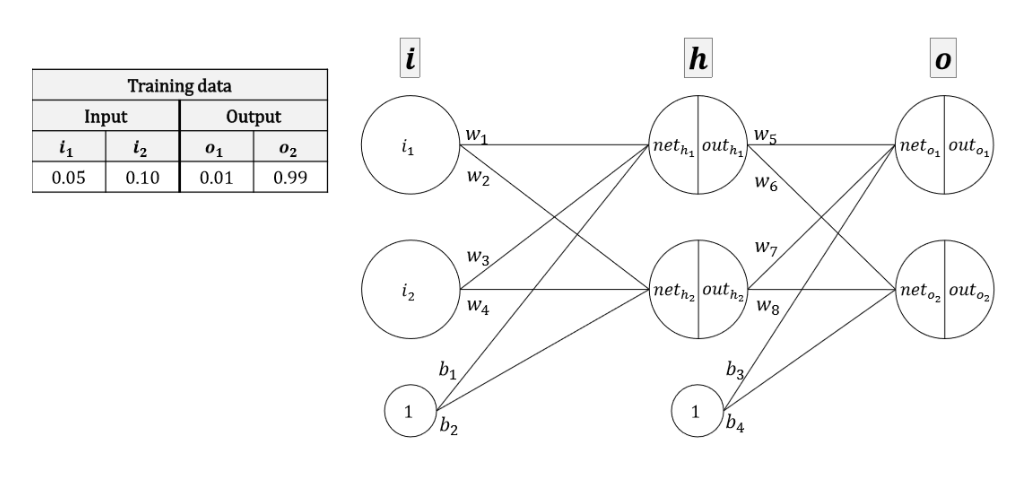

In [2]:
def ShowTotalError(i1, i2, o1, o2, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3, b4):
    
    def sigmoid(a):
        s = 1 / (1 + math.e**-a)
        return s

    def hidden1(i1,i2,w1,w2,b1):
        return i1*w1 + i2*w2 + b1

    hidden1op1 = sigmoid(hidden1(i1,i2,w1,w3,b1))
    hidden1op2 = sigmoid(hidden1(i1,i2,w2,w4,b2))
    op1 = sigmoid(hidden1(hidden1op1,hidden1op2,w5,w7,b3))
    op2 = sigmoid(hidden1(hidden1op1,hidden1op2,w6,w8,b4))
    
    #print("Target o1 : ",o1," , ", " Output op1 : ",op1)
    #print("Target o2 : ",o2," , ", " Output op2 : ",op2)
    
    Eo1 = 0.5 * (o1 - op1)**2
    Eo2 = 0.5 * (o2 - op2)**2
    Etotal = Eo1 + Eo2
    print("Total Error : " , Etotal)
    
    return op1, op2, hidden1op1, hidden1op2, Etotal

In [3]:
def updateWeightsV2(i,op,hiddenOp,target_w,*args):

    def Etotal_op(i, op):
        Etotal_op1 = (i - op) * -1
        return Etotal_op1

    def op_net(op):
        op1_net1 = op * (1 - op)
        return op1_net1

    def net_w(hiddenOp):
        net_w = hiddenOp
        return net_w
    
    def learingRatio(w,new_w):
        a = 0.5
        w = w - new_w * a
        return w
    
    bool = args[0]
    if(bool):
        updateWeight = Etotal_op(i, op) * op_net(op) * net_w(hiddenOp)
    else:
        op2, sub_w1, sub_w2 = args[1],args[2],args[3]
        updateWeight = net_w(i) * op_net(hiddenOp) * (sub_w1 *  op_net(op) * Etotal_op(i,op) + sub_w2 * op_net(op2) * Etotal_op(i,op2))

    new_w = learingRatio(target_w,updateWeight)
    return new_w

In [6]:
#Input Data
i1 , i2 = 0.05, 0.10
#Output Data
o1 , o2 = 0.01, 0.99

#Weights
w1, w2, w3, w4, w5, w6, w7, w8 = 0.15, 0.20, 0.25,0.30, 0.40, 0.45, 0.50, 0.55
b1, b2, b3, b4 = 0.35, 0.35, 0.60, 0.60

for i in range(1000):
    
    op1, op2, hidden1op1, hidden1op2, totalError = ShowTotalError(i1, i2, o1, o2, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3, b4)

    #隠れ層から後ろのweightsのアップデートの場合 : True
    new_w5 = updateWeightsV2(i1,op1,hidden1op1,w5,True)
    #print('Update Value of w5 :',new_w5)
    new_w6 = updateWeightsV2(i1,op2,hidden1op1,w6,True)
    #print('Update Value of w6 :',new_w6)
    new_w7 = updateWeightsV2(i2,op1,hidden1op2,w7,True)
    #print('Update Value of w7 :',new_w7)
    new_w8 = updateWeightsV2(i2,op2,hidden1op2,w8,True)
    #print('Update Value of w8 :',new_w8)

    #隠れ層から前のweightsのアップデートの場合 : Trueとchinルールにより後ろのweight2個が必要
    new_w1 = updateWeightsV2(i1,op1,hidden1op1,w1,False,op2,w5,w6)
    #print('Update Value of w1 :',new_w1)
    new_w2 = updateWeightsV2(i1,op1,hidden1op2,w2,False,op2,w7,w8)
    #print('Update Value of w2 :',new_w2)
    new_w3 = updateWeightsV2(i2,op1,hidden1op1,w3,False,op2,w5,w6)
    #print('Update Value of w3 :',new_w3)
    new_w4 = updateWeightsV2(i2,op1,hidden1op2,w4,False,op2,w7,w8)
    #print('Update Value of w4 :',new_w4)

    w1, w2, w3, w4, w5, w6, w7, w8 = new_w1, new_w2, new_w3, new_w4, new_w5, new_w6, new_w7, new_w8
    

Total Error :  0.303658313630144
Total Error :  0.2992955016965115
Total Error :  0.2949311904301251
Total Error :  0.2905824170591877
Total Error :  0.286267447318817
Total Error :  0.28200558954694693
Total Error :  0.27781695812369644
Total Error :  0.2737221886139586
Total Error :  0.26974210996676284
Total Error :  0.26589738223364917
Total Error :  0.2622081112273378
Total Error :  0.2586934540545096
Total Error :  0.25537123122812455
Total Error :  0.25225756184462106
Total Error :  0.24936653793345326
Total Error :  0.24670995250198313
Total Error :  0.24429709309356268
Total Error :  0.24213460906765866
Total Error :  0.24022645662140407
Total Error :  0.23857392118917475
Total Error :  0.2371757126792412
Total Error :  0.23602812539130058
Total Error :  0.23512525167783566
Total Error :  0.23445923662558396
Total Error :  0.23402056028067697
Total Error :  0.23379833415249085
Total Error :  0.2337805997523175
Total Error :  0.2339546185462381
Total Error :  0.2343071447002399